In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas_datareader import data as pdr
import datetime
import yfinance as yf

In [68]:
yf.pdr_override()
start = '2013-01-01'
end = datetime.datetime.today().strftime('%Y-%m-%d')
df = pdr.get_data_yahoo("AAPL", start, end)

print(df.tail())


[*********************100%***********************]  1 of 1 completed
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2023-04-19  165.800003  168.160004  165.539993  167.630005  167.630005   
2023-04-20  166.089996  167.869995  165.559998  166.649994  166.649994   
2023-04-21  165.050003  166.449997  164.490005  165.020004  165.020004   
2023-04-24  165.000000  165.600006  163.889999  165.330002  165.330002   
2023-04-25  165.190002  166.309998  163.729996  163.770004  163.770004   

              Volume  
Date                  
2023-04-19  47720200  
2023-04-20  52456400  
2023-04-21  58311900  
2023-04-24  41949600  
2023-04-25  48534900  


In [69]:
df = df.reset_index()
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-02,19.779285,19.821428,19.343929,19.608213,16.837116,560518000
1,2013-01-03,19.567142,19.631071,19.321428,19.360714,16.624588,352965200
2,2013-01-04,19.177500,19.236786,18.779642,18.821428,16.161524,594333600
3,2013-01-07,18.642857,18.903570,18.400000,18.710714,16.066452,484156400
4,2013-01-08,18.900356,18.996071,18.616072,18.761070,16.109690,458707200


In [70]:
df = df.drop(['Date','Adj Close'],axis = 1)
df.head()

,Open,High,Low,Close,Volume
0,19.779285,19.821428,19.343929,19.608213,560518000
1,19.567142,19.631071,19.321428,19.360714,352965200
2,19.177500,19.236786,18.779642,18.821428,594333600
3,18.642857,18.903570,18.400000,18.710714,484156400
4,18.900356,18.996071,18.616072,18.761070,458707200


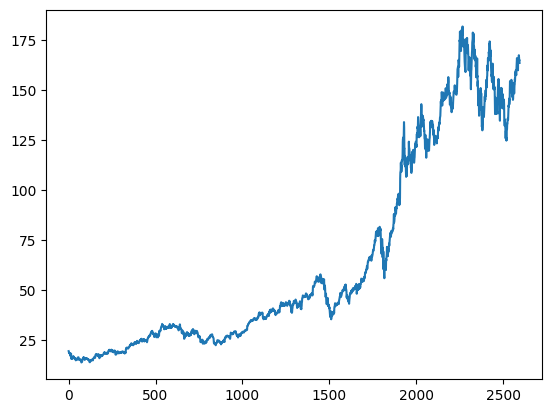

In [71]:
plt.plot(df.Close)

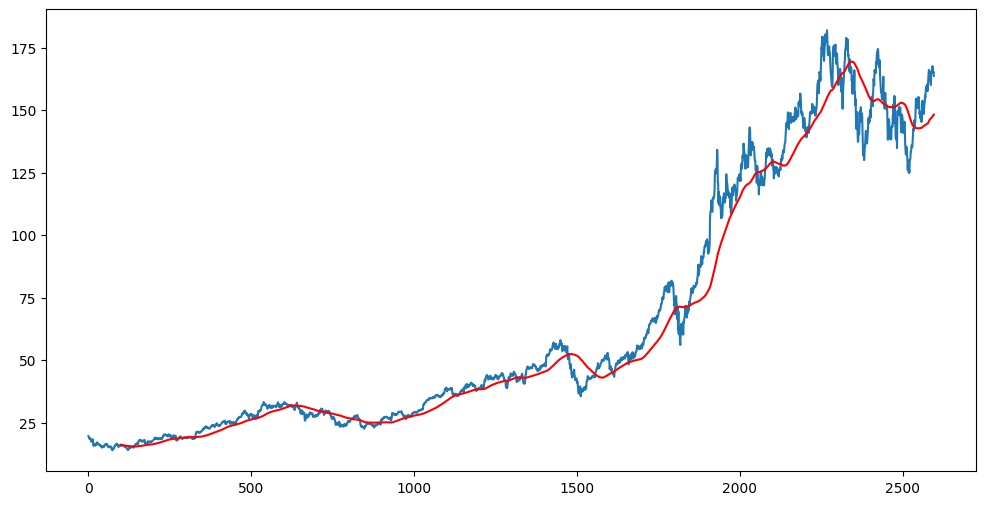

In [72]:
from matplotlib.cm import ma
ma100 = df.Close.rolling(100).mean() #rolling average of 100 days (used to visulize overall growth/decline of stock instead of constant peaks)
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')

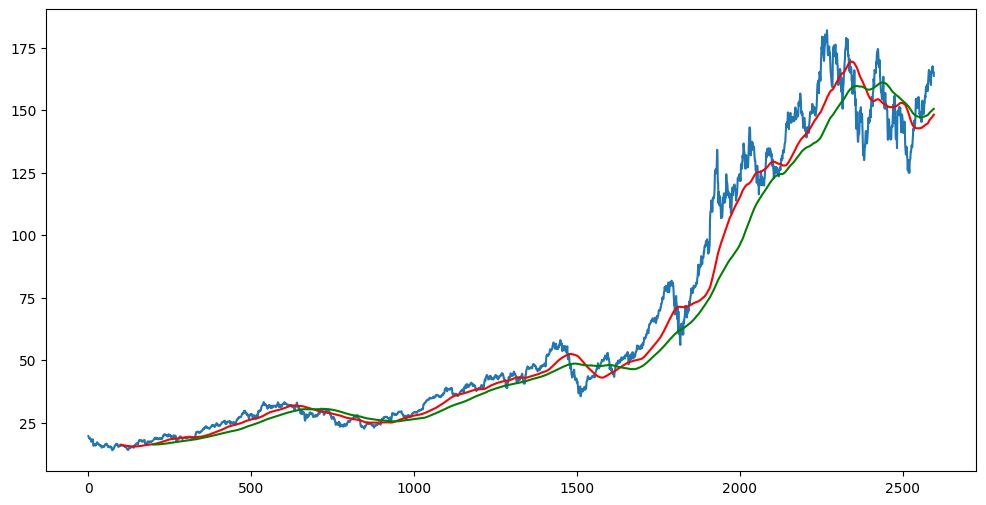

In [73]:
ma200 = df.Close.rolling(200).mean() #rolling average of 200 days (used to visulize overall growth/decline of stock instead of constant peaks)
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')
plt.plot(ma200,'g')

In [40]:
df.shape

(2092, 5)

In [74]:
# Spliting data into training testing.

data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])

print(data_training.shape)
print(data_testing.shape)


(1817, 1)
(779, 1)


In [75]:
# Scaling data to 0 to 1
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [76]:
data_training_array = scaler.fit_transform(data_training)
data_training_array.shape
# data_testing_array = scaler.fit_transform(data_testing)

(1817, 1)

In [77]:
x_train = [] #100 days feature (array of each 100 day step 1:100,2:101,3:102....)
y_train = [] #101 day's prediction (array of each 101st day 101,102,103.........)

for i in range(100,data_training_array.shape[0]):
  x_train.append(data_training_array[i-100:i])
  y_train.append(data_training_array[i,0])

x_train,y_train = np.array(x_train),np.array(y_train) # np arays for ML model

In [78]:
# ML model
from keras.layers import Dense, Dropout,LSTM
from keras.models import Sequential

In [79]:
model = Sequential()
# 1
model.add(LSTM(units=50,activation='relu',return_sequences=True,input_shape= (x_train.shape[1],1)))
model.add(Dropout(0.2))
# 2
model.add(LSTM(units=60,activation='relu',return_sequences=True))
model.add(Dropout(0.3))
# 3
model.add(LSTM(units=80,activation='relu',return_sequences=True))
model.add(Dropout(0.4))
# 4
model.add(LSTM(units=120,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

In [80]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_8 (LSTM)               (None, 100, 50)           10400     
                                                                 
 dropout_8 (Dropout)         (None, 100, 50)           0         
                                                                 
 lstm_9 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_9 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_10 (LSTM)              (None, 100, 80)           45120     
                                                                 
 dropout_10 (Dropout)        (None, 100, 80)           0         
                                                                 
 lstm_11 (LSTM)              (None, 120)              

In [81]:
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(x_train,y_train,epochs=50)

Epoch 1/50
54/54 [==============================] - 31s 383ms/step - loss: 0.0346
Epoch 2/50
54/54 [==============================] - 21s 391ms/step - loss: 0.0062
Epoch 3/50
54/54 [==============================] - 21s 389ms/step - loss: 0.0059
Epoch 4/50
54/54 [==============================] - 21s 390ms/step - loss: 0.0051
Epoch 5/50
54/54 [==============================] - 21s 383ms/step - loss: 0.0045
Epoch 6/50
54/54 [==============================] - 20s 375ms/step - loss: 0.0046
Epoch 7/50
54/54 [==============================] - 20s 375ms/step - loss: 0.0045
Epoch 8/50
54/54 [==============================] - 20s 377ms/step - loss: 0.0040
Epoch 9/50
54/54 [==============================] - 20s 375ms/step - loss: 0.0039
Epoch 10/50
54/54 [==============================] - 21s 388ms/step - loss: 0.0035
Epoch 11/50
54/54 [==============================] - 20s 369ms/step - loss: 0.0035
Epoch 12/50
54/54 [==============================] - 20s 372ms/step - loss: 0.0040
Epoch 13/50
5

In [82]:
model.save('keras_model.h5')

In [83]:
past_100_days = data_training.tail(100)
print(past_100_days.shape)
final_df = past_100_days.append(data_testing,ignore_index=True)
print(data_testing.shape)
print(final_df.shape)


(100, 1)
(779, 1)
(879, 1)


C:\Users\hp\AppData\Local\Temp\ipykernel_20388\3085210295.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = past_100_days.append(data_testing,ignore_index=True)


In [84]:
input_data = scaler.fit_transform(final_df)
input_data.shape

(879, 1)

In [85]:
x_test=[]
y_test = []
for i in range(100,input_data.shape[0]):
  x_test.append(input_data[i-100:i])
  y_test.append(input_data[i,0])
x_test,y_test = np.array(x_test),np.array(y_test)
print(x_test.shape)

(779, 100, 1)


In [86]:
# making predictions
y_pred = model.predict(x_test)
y_pred.shape

25/25 [==============================] - 9s 188ms/step


(779, 1)

In [87]:
scale_factor = 1/scaler.scale_[0]
y_pred = y_pred * scale_factor
y_test = y_test * scale_factor

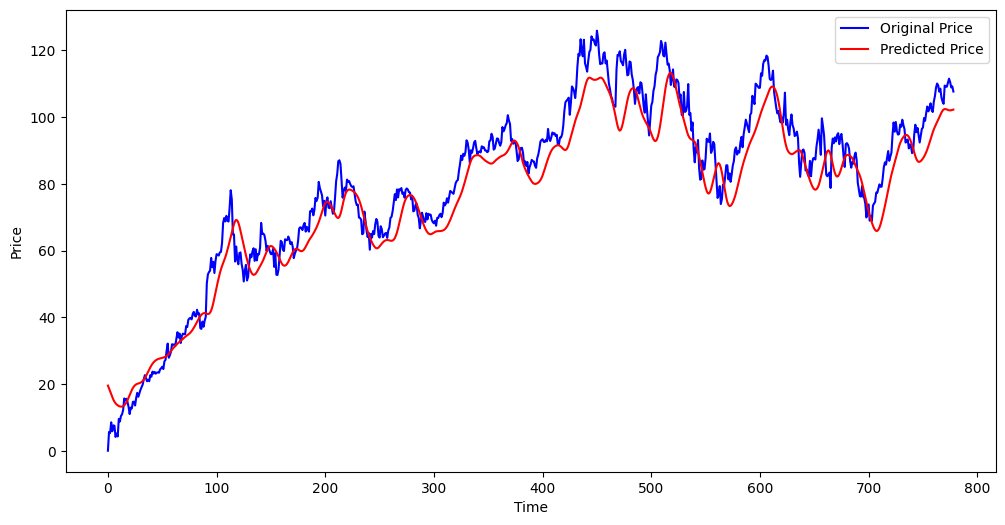

 Actual Price: 107.67750549316405
 Predicted Price: 102.2708


In [88]:
plt.figure(figsize=(12,6))
plt.plot(y_test,'b',label='Original Price')
plt.plot(y_pred,'r',label='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

print(" Actual Price:",y_test[len(y_test)-1])
print(" Predicted Price:",y_pred[len(y_pred)-1][0])